## Assignment 7

**Dency Claris Thomas**

The goal of this lab is to introduce the basic models used to simulate epidemics in networks, experiment with them and compare them. 
We will explore both types of diffusion models, decision-based and epidemic ones.
As a use case, we are going to use the coauthorship network of network scientists, which you can load with the function read gml from networkx library.

The following questions can be answered with the help of networkx and NDlib. You may also use other packages to deal with the problem. Please answer the following
questions on the networks you have and submit your executable code.

In [1]:
path = "C:\\Users\\dency\\OneDrive\\Documents\\ACN\\Analysis-of-Complex-Networks---Assignments\\datasets\\"

In [2]:
# download a file from a url 
import requests

def download(url,file_name):
    get_response = requests.get(url)
    with open(file_name, "wb") as out_file:
        out_file.write(get_response.content)

download(url = "http://www.casos.cs.cmu.edu/computational_tools/datasets/external/netscience/netscience.gml", file_name=path+"netscience.gml")

In [3]:
# Read the data and show the basic information
import networkx as nx

# Define the path to the dataset
file_path = "datasets/netscience.gml"

# Read the GML file into a NetworkX graph
coauthorship_network = nx.read_gml(file_path)

# Display basic information about the graph
print("Basic Information about the Coauthorship Network:")
print(f"Number of nodes: {coauthorship_network.number_of_nodes()}")
print(f"Number of edges: {coauthorship_network.number_of_edges()}")

# Check if the graph is directed
print(f"Is the graph directed? {'Yes' if coauthorship_network.is_directed() else 'No'}")

# Display additional properties
largest_cc = max(nx.connected_components(coauthorship_network), key=len)
print(f"Size of largest connected component: {len(largest_cc)}")


Basic Information about the Coauthorship Network:
Number of nodes: 1589
Number of edges: 2742
Is the graph directed? No
Size of largest connected component: 379


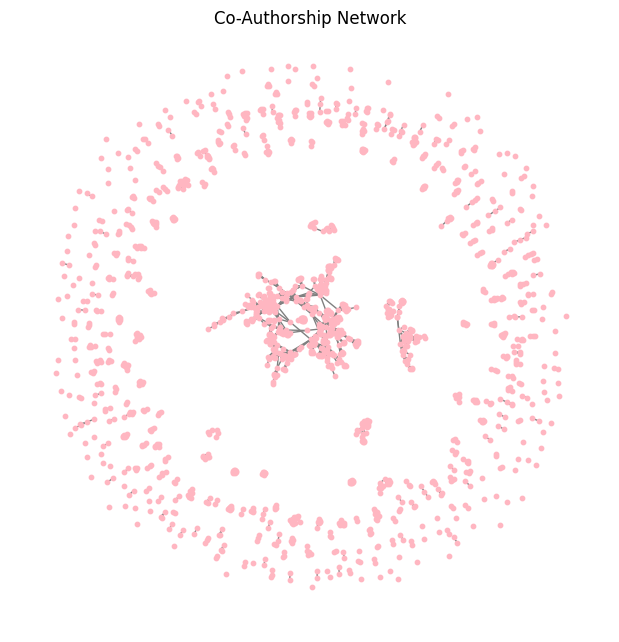

In [4]:
import matplotlib.pyplot as plt

# Plot the Network
plt.figure(figsize=(6,6))
nx.draw(coauthorship_network, with_labels=False, node_size=10, node_color="lightpink", edge_color="gray")
plt.title("Co-Authorship Network")
plt.show()

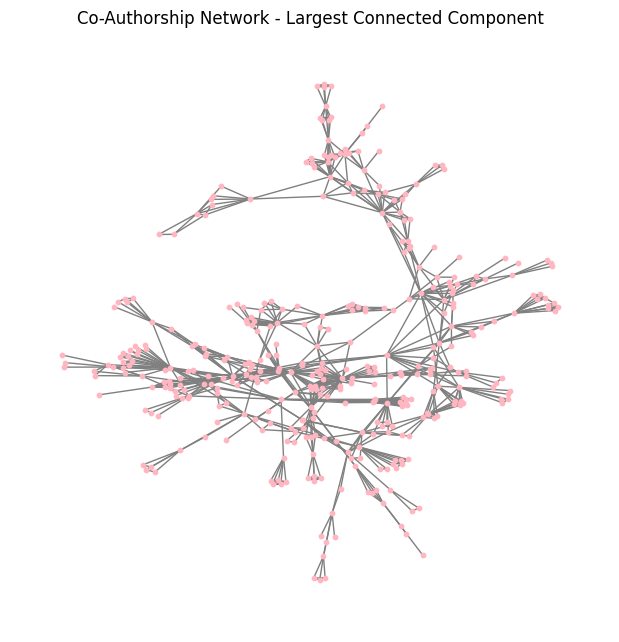

In [5]:
# Create the graph with the largest connected component
largest_cc_graph = coauthorship_network.subgraph(largest_cc).copy()

# Plot the graph
plt.figure(figsize=(6,6))
nx.draw(largest_cc_graph, with_labels=False, node_size=10, node_color="lightpink", edge_color="gray")
plt.title("Co-Authorship Network - Largest Connected Component")
plt.show()

**(a)** The Sznajd model is a variant of spin model based on social impact, which
takes into account the fact that a group of individuals with the same opinion can influence their
neighbours more than one single individual. Please use the Sznajd model to simulate the cascade
of misinformation between the network of network scientists for 100 steps with different initial ”infected” numbers: 100, 300, and 700. Please visualize the results and output a prevalence plot. (May refer to NDlib.)

In [6]:
def plot_diffusion_trend_and_prevalence(trends, num_iterations, total_nodes):
    """
    Visualizes the trend and prevalence of opinions in the network.
    trends: List of trend data containing node counts for each opinion.
    num_iterations: Total number of iterations.
    total_nodes: Total number of nodes in the network.
    """
    # Initialize lists to store the number of nodes with each opinion over iterations
    pos_opinion_trend = []
    neg_opinion_trend = []

    for trend in trends:
        pos_count = trend['trends']['node_count'][0]  # Count of +1 opinions
        neg_count = trend['trends']['node_count'][1]  # Count of -1 opinions
        pos_opinion_trend.append(pos_count)
        neg_opinion_trend.append(neg_count)

    # Calculate prevalence
    pos_opinion_prevalence = [count / total_nodes for count in pos_opinion_trend]
    neg_opinion_prevalence = [count / total_nodes for count in neg_opinion_trend]

    # Create a figure with two subplots
    fig, ax = plt.subplots(2, 1, figsize=(10, 10))

    # Plot Trend
    ax[0].plot(range(num_iterations), pos_opinion_trend, label='Opinion +1 (Count)', color='blue')
    ax[0].plot(range(num_iterations), neg_opinion_trend, label='Opinion -1 (Count)', color='red')
    ax[0].set_title("Trend of Opinion Spread")
    ax[0].set_xlabel("Iterations")
    ax[0].set_ylabel("Number of Nodes")
    ax[0].legend()

    # Plot Prevalence
    ax[1].plot(range(num_iterations), pos_opinion_prevalence, label='Opinion +1 (Prevalence)', color='blue')
    ax[1].plot(range(num_iterations), neg_opinion_prevalence, label='Opinion -1 (Prevalence)', color='red')
    ax[1].set_title("Prevalence of Opinions")
    ax[1].set_xlabel("Iterations")
    ax[1].set_ylabel("Fraction of Nodes")
    ax[1].legend()

    plt.tight_layout()
    plt.show()



In [7]:
import ndlib.models.ModelConfig as mc
import ndlib.models.opinions as op
import random

def sznajd_model(G, initial_infected_number, num_iterations):
    """
    Simulate the Sznajd model for opinion dynamics in a network.
    G: NetworkX graph representing the network.
    initial_infected_number: Number of nodes with initial opinion +1.
    num_iterations: Total number of iterations to simulate.
    """
    # Initialize opinions: 1 for +1, -1 for -1
    opinions = {node: -1 for node in G.nodes}
    initial_infected_nodes = random.sample(list(G.nodes), initial_infected_number)
    for node in initial_infected_nodes:
        opinions[node] = 1

    # Track trends
    trends = []

    for iteration in range(num_iterations):
        # Select a random node and its neighbors
        node = random.choice(list(G.nodes))
        neighbors = list(G.neighbors(node))
        if len(neighbors) < 2:
            continue  # Skip if the node has fewer than 2 neighbors

        # Choose two random neighbors
        pair = random.sample(neighbors, 2)

        # If both neighbors have the same opinion, propagate it to all their neighbors
        if opinions[pair[0]] == opinions[pair[1]]:
            for neighbor in neighbors:
                opinions[neighbor] = opinions[pair[0]]

        # Count opinions
        positive_count = sum(1 for opinion in opinions.values() if opinion == 1)
        negative_count = sum(1 for opinion in opinions.values() if opinion == -1)

        # Track current trends
        trends.append({
            'trends': {  # Match structure for plotting function
                'node_count': [positive_count, negative_count]
            }
        })

        # Early stopping: if no further changes are possible
        if positive_count == len(G.nodes) or negative_count == len(G.nodes):
            break

    # Pad trends with steady-state values if iterations completed early
    while len(trends) < num_iterations:
        trends.append(trends[-1])

    # Visualize the result
    plot_diffusion_trend_and_prevalence(trends, num_iterations, len(G.nodes))


Sznajd model with 100 initial infected nodes


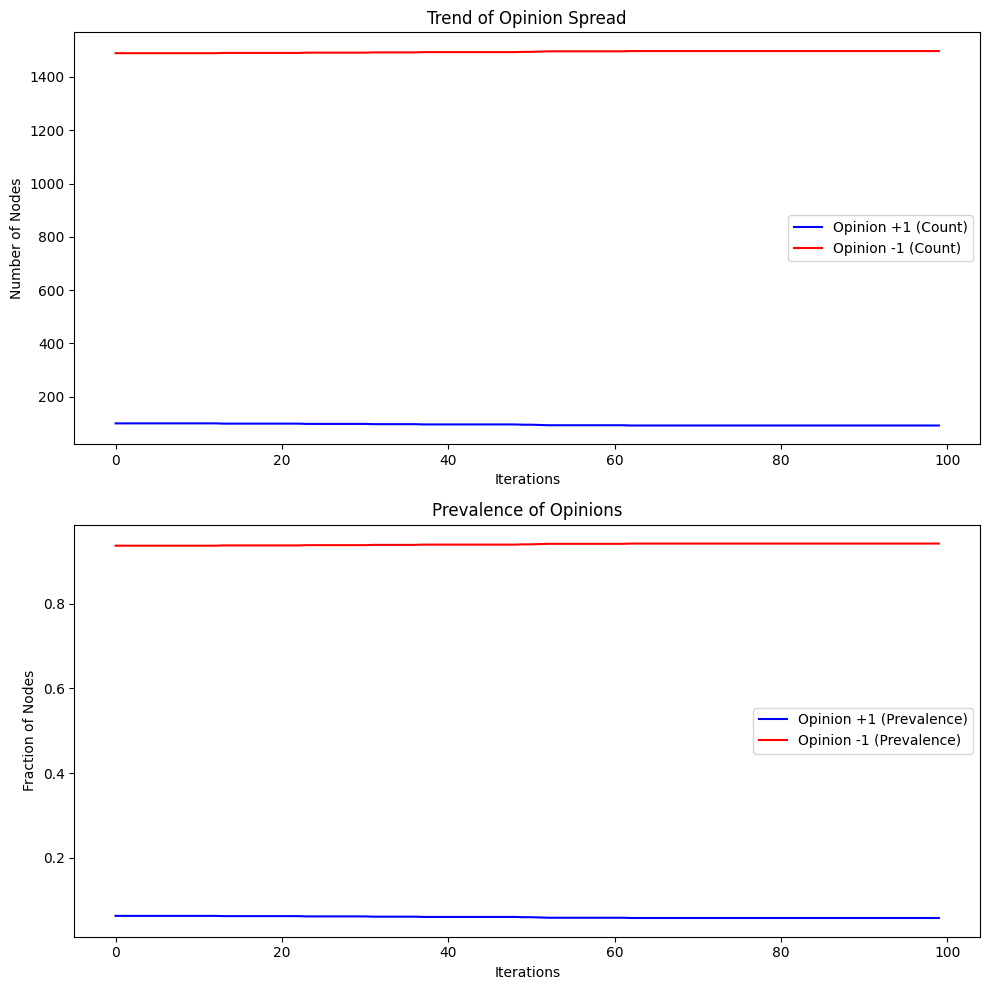

Sznajd model with 300 initial infected nodes


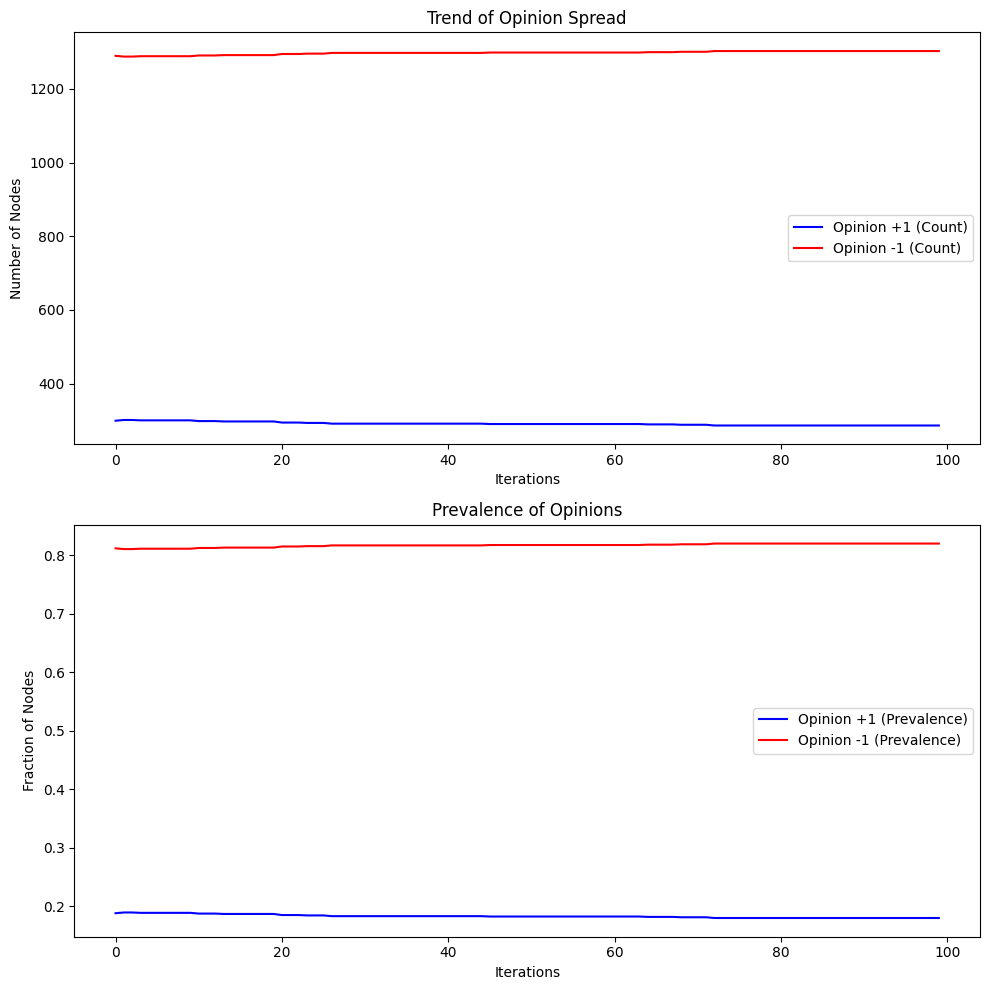

Sznajd model with 700 initial infected nodes


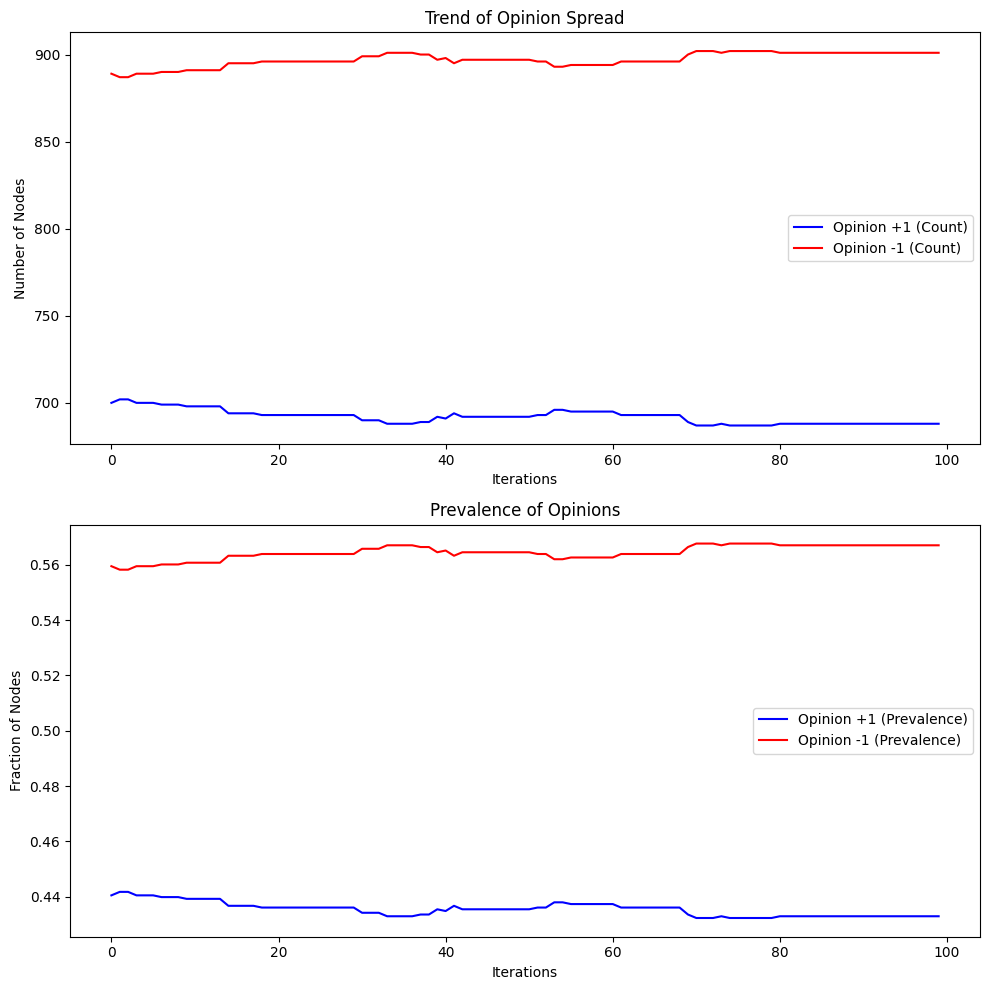

In [8]:
# Run the Sznajd model simulation for different initial infection numbers
number_iterations = 100
initial_infected_numbers = [100, 300, 700]

for infected in initial_infected_numbers:
    print(f"Sznajd model with {infected} initial infected nodes")
    sznajd_model(coauthorship_network, infected, number_iterations)



**(b)** Although the interaction networks in real-life are different from the social networks we have, it is still meaningful to simulate the epidemics cascade with our dataset. The SIR model was introduced in 1927 by Kermack. In this model, during the course of an epidemic, a node is allowed to change its status from Susceptible (S) to Infected (I), then to Removed (R). Please use the SIR model to simulate for 100 iterations the cascade of the epidemic with the same number of initially infected nodes (suggested 0.5), with the following three sets of infection/removal probabilities: (0.5, 0.2), (0.3, 0.3), (0.4, 0.5) on the network science dataset, and visualize the results.

Running SIR model simulation with infection_prob = 0.5 and removal_prob = 0.2


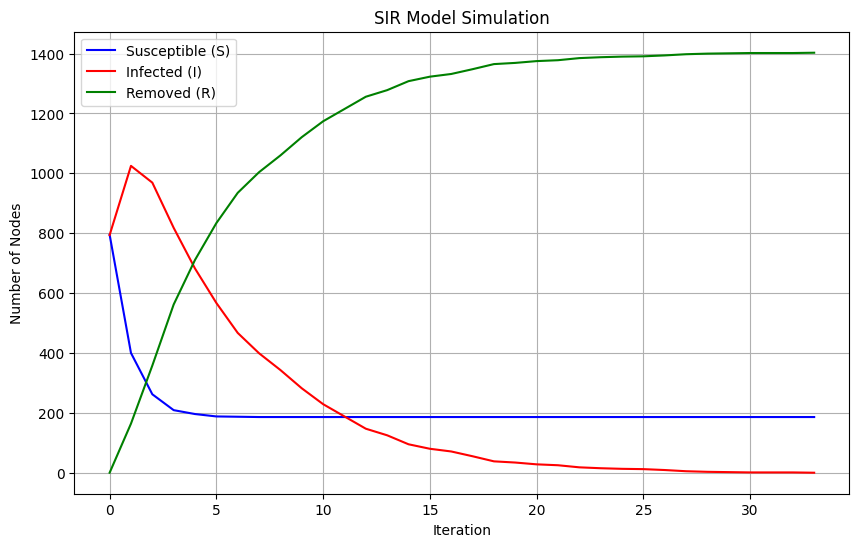

Running SIR model simulation with infection_prob = 0.3 and removal_prob = 0.3


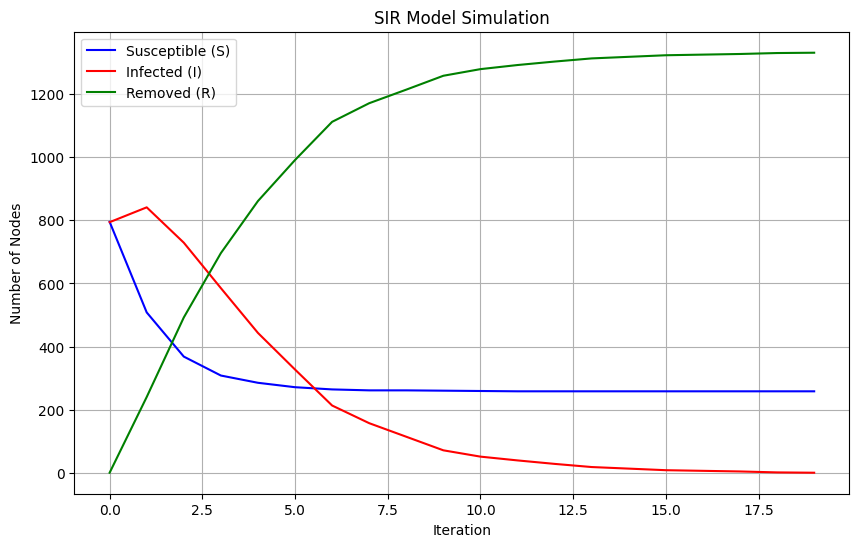

Running SIR model simulation with infection_prob = 0.4 and removal_prob = 0.5


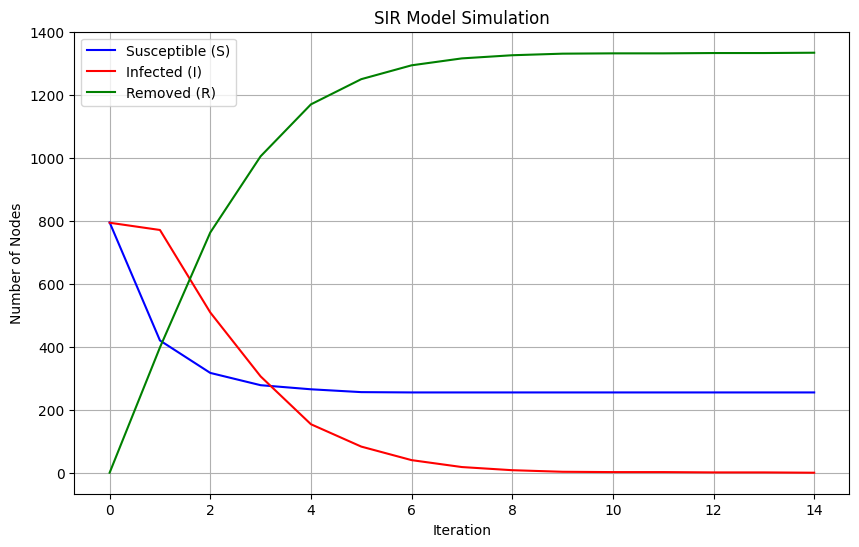

In [9]:
def SIR_model(G, ini_infect, infection_prob, removal_prob, num_iterations):
    """
    Args:
        G: networkx graph
        ini_infect (float): initial fraction of infected nodes
        infection_prob (float): probability of infection
        removal_prob (float): probability of removal
        num_iterations (int): number of iterations
    """
    # Initialize states
    node_states = {node: 'S' for node in G.nodes}  # All nodes start as Susceptible (S)
    num_initial_infected = int(ini_infect * len(G.nodes))
    initial_infected_nodes = random.sample(list(G.nodes), num_initial_infected)

    # Infect the initial set of nodes
    for node in initial_infected_nodes:
        node_states[node] = 'I'

    # Track results for visualization
    trends = []

    for iteration in range(num_iterations):
        # Store counts of each state
        counts = {'S': 0, 'I': 0, 'R': 0}
        for state in node_states.values():
            counts[state] += 1

        # Save current trend
        trends.append(counts)

        # Update states
        new_states = node_states.copy()
        for node in G.nodes:
            if node_states[node] == 'S':  # Susceptible node
                # Check if it gets infected
                neighbors = G.neighbors(node)
                infected_neighbors = [nbr for nbr in neighbors if node_states[nbr] == 'I']
                if any(random.random() < infection_prob for _ in infected_neighbors):
                    new_states[node] = 'I'

            elif node_states[node] == 'I':  # Infected node
                # Check if it gets removed
                if random.random() < removal_prob:
                    new_states[node] = 'R'

        # Update the state for the next iteration
        node_states = new_states

        # Stop if no more infected nodes
        if counts['I'] == 0:
            break

    # Visualize results
    plot_SIR_trends(trends, num_iterations)

    return trends

def plot_SIR_trends(trends, num_iterations):
    """
    Plot SIR trends based on simulation results.
    """
    S_trend = [t['S'] for t in trends]
    I_trend = [t['I'] for t in trends]
    R_trend = [t['R'] for t in trends]

    plt.figure(figsize=(10, 6))
    plt.plot(range(len(S_trend)), S_trend, label="Susceptible (S)", color='blue')
    plt.plot(range(len(I_trend)), I_trend, label="Infected (I)", color='red')
    plt.plot(range(len(R_trend)), R_trend, label="Removed (R)", color='green')

    plt.title("SIR Model Simulation")
    plt.xlabel("Iteration")
    plt.ylabel("Number of Nodes")
    plt.legend()
    plt.grid()
    plt.show()

# Run the simulation for the given probabilities
ini_infect = 0.5
num_iterations = 100

# Run the SIR model for each set of probabilities
probabilities = [(0.5, 0.2), (0.3, 0.3), (0.4, 0.5)]
for infection_prob, removal_prob in probabilities:
    print(f"Running SIR model simulation with infection_prob = {infection_prob} and removal_prob = {removal_prob}")
    SIR_model(coauthorship_network, ini_infect, infection_prob, removal_prob, num_iterations)
